In [1]:
import pandas as pd

In [2]:
f = pd.read_pickle('../data/processed/model_ready.pkl')

In [9]:
f

,mid_salary,rating,scientist,engineer,analyst,machine,business,manager,senior,junior,...,state_NC,state_NJ,state_NY,state_OH,state_PA,state_SC,state_TX,state_UT,state_VA,state_WA
0,37000.0,3.2,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,37000.0,3.8,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,37000.0,3.4,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
3,37000.0,4.1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,37000.0,3.9,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6130,55000.0,4.4,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6131,55000.0,5.0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
6132,55000.0,3.8,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6133,55000.0,4.0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [28]:
X = f.loc[:,'rating':]

y = f['mid_salary'].values

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Lets start by trying a linear model

In [ ]:
from sklearn import linear_model

In [16]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression().fit(X_train_scaled, y_train)
print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test_scaled, y_test)))

linear model coeff (w): [ 3.20261783e+03  6.72101166e+03 -3.43216115e+02 -1.67462332e+04
  8.28061961e+03 -6.34528841e+02  3.60812152e+02  4.80262565e+01
 -2.99153603e+03 -2.54701508e+03  2.11161671e+03  2.05288140e+03
 -1.84744448e+03  2.59507726e+03  2.02317263e+03 -2.33786155e+03
  2.05355675e+03 -1.80458475e+03 -2.70487615e+03 -7.22630463e+02
  1.74967980e+03  1.77507801e+03  5.09203993e+02  2.48759276e+03
  5.28057751e+02 -8.35508838e+02  3.62795291e+03 -1.10987201e+03
  1.15262100e+04 -3.89522808e+03 -3.59216003e+03  7.51962394e+03
  1.27609724e+04 -4.15432002e+04  4.85021205e+03 -2.18772277e+03
  2.34208546e+16 -2.03377279e+15  2.34208546e+16 -5.92348232e+15
 -6.25884367e+15  7.02146652e+15 -1.84510071e+16  7.02146652e+15
 -4.22170934e+16 -1.84510071e+16  2.34208546e+16  5.42302133e+15
 -1.13125569e+15 -1.13125569e+15  5.07726326e+15 -2.82800211e+16
  2.34208546e+16  4.65082939e+14  6.77928056e+15  4.65082939e+14
  2.34208546e+16  7.02146652e+15  2.90212314e+15  5.07726326e+15
 

That was horrible. How can r^2 even be neg? Prob too many multicolinear features. Next we try ridge which penalizes high coeff.

In [20]:
from sklearn.linear_model import Ridge
import numpy as np
linridge = Ridge(alpha=20.0).fit(X_train_scaled, y_train)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


print('Jobs dataset')
print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test_scaled, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

Jobs dataset
ridge regression linear model intercept: 65787.91856605314
ridge regression linear model coeff:
[ 2.63975171e+03  6.99460154e+03  6.38648286e+01 -1.65014480e+04
  7.19663223e+03 -4.61070295e+02  5.13622730e+02 -6.43182167e+00
 -2.88839436e+03 -2.16928243e+03  1.79669947e+03  1.88433260e+03
 -1.35241398e+03  2.90138593e+03  1.99977869e+03 -2.29203645e+03
  2.11234184e+03 -1.74517401e+03 -2.40427464e+03 -6.55390972e+02
  1.30210377e+03  3.91344598e+02 -7.70175662e+00  1.96134165e+03
  5.73727798e+02 -7.99972977e+00  1.80515788e+03 -1.04150562e+02
  6.19727276e+03 -1.87599956e+03 -3.42238179e+03  2.36849459e+03
  5.24856235e+03 -1.86247201e+03  6.08172799e+02 -1.68851328e+03
  4.31892968e+03  2.18097075e+01 -1.86156929e+03  3.63954013e+03
  0.00000000e+00  1.36123373e+02 -1.84924073e+02 -2.10054263e+02
 -2.06674756e+03 -2.76088692e+02  6.23383936e+02  1.20992273e+03
  2.06824873e+03 -3.93947809e+02  1.15632230e+03 -2.56650056e+03
  1.67033351e+03 -9.33389845e+02  2.88216192e+

Def better than before. Let's try lasso regression which will force some coeff to be zero.

In [29]:
X

,rating,scientist,engineer,analyst,machine,business,manager,senior,junior,big,...,state_NC,state_NJ,state_NY,state_OH,state_PA,state_SC,state_TX,state_UT,state_VA,state_WA
0,3.2,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,3.8,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,3.4,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,4.1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3.9,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6130,4.4,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6131,5.0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
6132,3.8,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6133,4.0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [30]:
from sklearn.linear_model import Lasso
linlasso = Lasso(alpha=2.0, max_iter = 10000).fit(X_train_scaled, y_train)

print('Jobs dataset')
print('lasso regression linear model intercept: {}'
     .format(linlasso.intercept_))
print('lasso regression linear model coeff:\n{}'
     .format(linlasso.coef_))
print('Non-zero features: {}'
     .format(np.sum(linlasso.coef_ != 0)))
print('R-squared score (training): {:.3f}'
     .format(linlasso.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}\n'
     .format(linlasso.score(X_test_scaled, y_test)))
print('Features with non-zero weight (sorted by absolute magnitude):')
for e in sorted (list(zip(list(X), linlasso.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))

Jobs dataset
lasso regression linear model intercept: 66136.350693716
lasso regression linear model coeff:
[ 3.14537377e+03  6.70288608e+03 -2.46597274e+02 -1.67806564e+04
  8.18111915e+03 -5.25388526e+02  3.08563801e+02  2.14485167e+01
 -2.99611783e+03 -2.46624718e+03  2.05778015e+03  1.95363472e+03
 -1.72338607e+03  2.61789243e+03  2.01015611e+03 -2.31275854e+03
  2.04444844e+03 -1.78376969e+03 -2.67984384e+03 -7.11925870e+02
  1.65377595e+03  1.72214583e+03  1.22941094e+02  2.47810441e+03
  6.32217898e+02 -5.88640456e+02  3.33666690e+03 -0.00000000e+00
  1.11641753e+04 -3.37860642e+03 -3.44984759e+03  6.61405626e+03
  1.21541908e+04 -2.20993367e+04  2.21844888e+03 -2.00983126e+03
  5.71692591e+03  2.65887271e+02 -2.07079140e+03  7.36066559e+04
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -3.25870470e+03 -1.18202455e+03  3.10656817e+03  1.47279466e+03
  9.90016363e+03 -0.00000000e+00  7.50071126e+03 -5.99688632e+03
  2.67028172e+04 -3.89668419e+02  4.14518383e+03

Lasso regression performed slightly worse than ridge regression.
It thinks that audiovisual industry pays a lot more. Interesting.

In [31]:
ff = pd.read_pickle('../data/interim/combined.pkl')

In [35]:
pd.set_option('max_rows',1000)

In [38]:
by_industry = ff.groupby('industry')['mid_salary'].agg(['mean','median','count']).sort_values(by='mean',ascending=False).reset_index()

In [42]:
by_industry[by_industry['industry'].str.contains('visual')]

,industry,mean,median,count
32,Audiovisual,77000.0,73000.0,3


Audiovisual is ranked 32nd in terms of industry, so i don't see why it should matter much at all in the regression.

In [44]:
print('Lasso regression: effect of alpha regularization\n\
parameter on number of features kept in final model\n')

for alpha in [0.5, 1, 2, 3, 5, 10, 20, 50, 100]:
    linlasso = Lasso(alpha, max_iter = 10000).fit(X_train_scaled, y_train)
    r2_train = linlasso.score(X_train_scaled, y_train)
    r2_test = linlasso.score(X_test_scaled, y_test)
    
    print('Alpha = {:.2f}\nFeatures kept: {}, r-squared training: {:.2f}, \
r-squared test: {:.2f}\n'
         .format(alpha, np.sum(linlasso.coef_ != 0), r2_train, r2_test))

Lasso regression: effect of alpha regularization
parameter on number of features kept in final model

Alpha = 0.50
Features kept: 154, r-squared training: 0.33, r-squared test: 0.32

Alpha = 1.00
Features kept: 149, r-squared training: 0.32, r-squared test: 0.32

Alpha = 2.00
Features kept: 139, r-squared training: 0.32, r-squared test: 0.33

Alpha = 3.00
Features kept: 130, r-squared training: 0.32, r-squared test: 0.33

Alpha = 5.00
Features kept: 116, r-squared training: 0.32, r-squared test: 0.33

Alpha = 10.00
Features kept: 96, r-squared training: 0.32, r-squared test: 0.34

Alpha = 20.00
Features kept: 72, r-squared training: 0.32, r-squared test: 0.34

Alpha = 50.00
Features kept: 49, r-squared training: 0.31, r-squared test: 0.34

Alpha = 100.00
Features kept: 30, r-squared training: 0.30, r-squared test: 0.33



It seems like the fewer features the better up to a point.

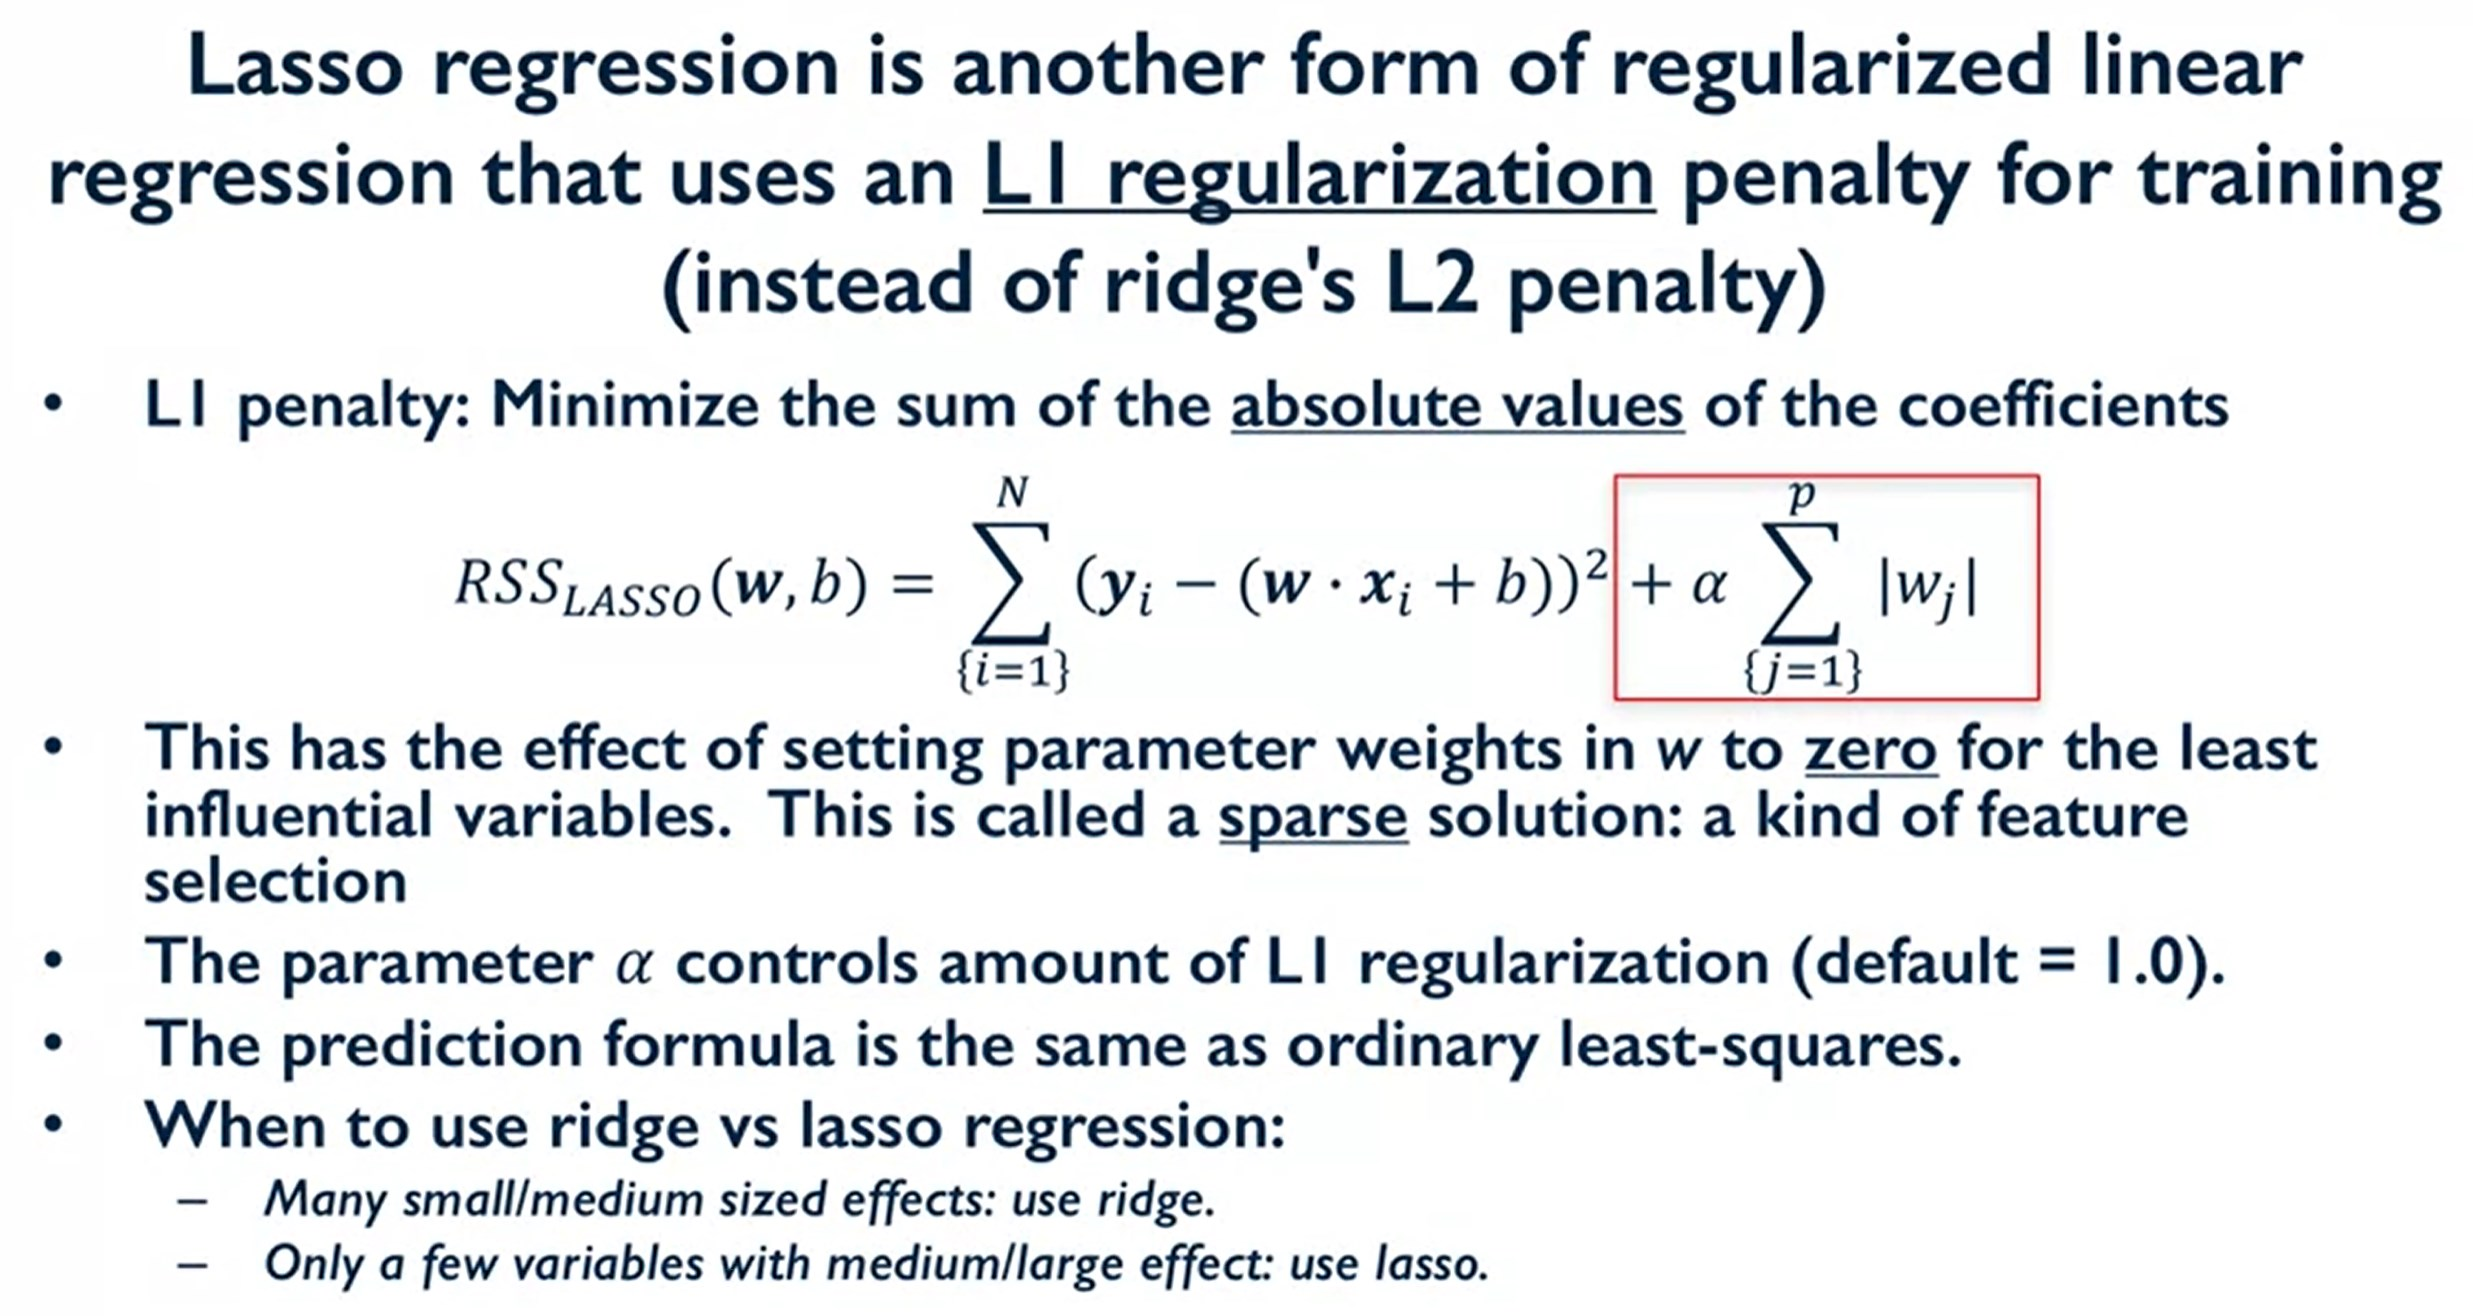

In [26]:
from sklearn.metrics import mean_absolute_error as mae

mae(y_test,y_pred)

21087.810332625555